In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import  linear_model
from sklearn.preprocessing import  PolynomialFeatures
%matplotlib inline

In [2]:
# 调用线性回归模型并在 ax 上绘图(数据处理)
def regression(xs,ys,ax,fig,c):
    lr = LinearRegression()
    xs = np.array(xs).reshape(-1, 1); ys = np.array(ys).reshape(-1,1)
    
    lr.fit(xs,ys) # 训练模型
        
    length = np.max(xs) - np.min(xs)
    min_1 = np.min(xs) - (length)*0.03; max_1 = np.max(xs) + (length)*0.03
    xs_hat = np.row_stack((xs,[min_1]))
    xs_hat = np.row_stack((xs_hat,[max_1])); 
    ys_hat = lr.predict(xs_hat) # 计算 ys_hat
    
    #target_point = ax.scatter(xs, ys, c=c, s=30, alpha=0.6, edgecolors='none')
    #plt.legend([target_point],['selected points'], fontsize=16)
    ax.plot(xs_hat, ys_hat, c=c, alpha =0.6, linewidth=1)
    
    k = (np.max(ys_hat) - np.min(ys_hat))/(np.max(xs_hat) - np.min(xs_hat))
    b = lr.predict([[0]])[0][0]
    
    left, width = 0.1, 1; bottom, height = 0.1, 1; spacing = 0.1
    rect_text = [left + width*0.55, bottom + height*0.6]
    text = 'Work Function is $y = ' + str(format(k, '.4f')) + 'x + ' + str(format(b, '.4f')) + '$'
    ax.annotate(text, xy=(np.average(xs), np.average(ys)), xytext=(np.average(xs)-0.35,
            np.average(ys)+0.004),color=c,fontsize=20, arrowprops=dict(facecolor=c, shrink=0.05))
    
    return k,b

In [7]:
def poly_regression(xs,ys,ax,fig,c):
    #将datasets_X转化为数组，并变为二维，以符合线性回归拟合函数输入参数要求
    length =len(xs)
    datasets_X = np.array(xs).reshape([length,1])
    #将datasets_Y转化为数组
    datasets_Y = np.array(ys)

    minX =min(datasets_X);maxX =max(datasets_X)
    #以数据datasets_X的最大值和最小值为范围，建立等差数列，方便后续画图。
    X=np.arange(minX,maxX,0.0001).reshape([-1,1])

    poly_reg =PolynomialFeatures(degree=10)###############
    X_ploy =poly_reg.fit_transform(datasets_X)
    lin_reg_2=linear_model.LinearRegression()
    lin_reg_2.fit(X_ploy,datasets_Y)

    ax.scatter(datasets_X,datasets_Y,color=c)
    ax.plot(X/100,lin_reg_2.predict(poly_reg.fit_transform(X)),color=c)

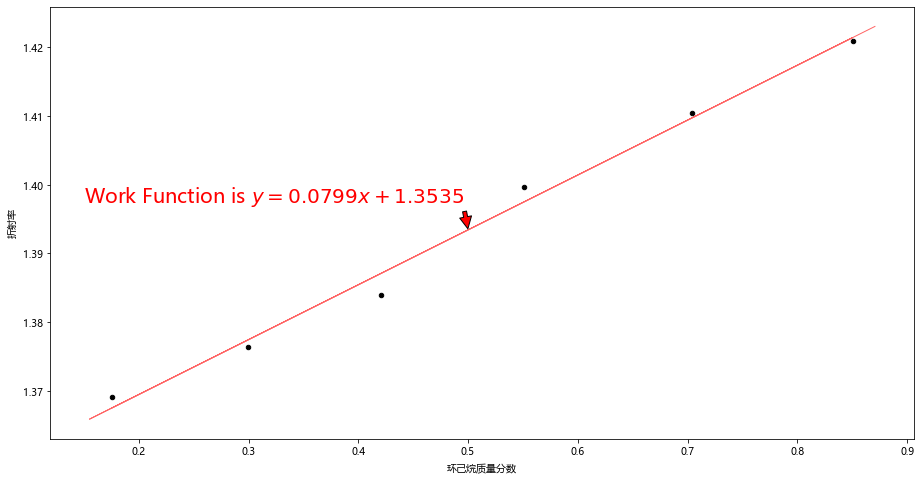

In [4]:
## 内置的工作曲线
ns = [1.3691, 1.3764, 1.3840, 1.3997, 1.4105, 1.4209] # 折射率
cs = [0.175346849,0.299474606,0.420599517,0.550557806,0.703788193,0.850435979]# 组分（环己烷占比）

left, width = 0.1, 1; bottom, height = 0.1, 1; spacing = 0.1
rect = [left*0, bottom, width, height]; rect_text = [left + width*0.45, bottom+height*0.7]
fig1 = plt.figure(figsize=(12,6)); ax1 = fig1.add_axes(rect)
plt.rcParams['figure.dpi'] = 300 # 每英寸点数
plt.rcParams['font.size'] = 18

ax1.scatter(cs,ns,c='k',s=20)
ax1.set_xlabel('环己烷质量分数'); ax1.set_ylabel('折射率')
k,b = regression(xs=cs,ys=ns,ax=ax1,fig=fig1,c='r') # y_hat = kx+b
plt.savefig('工作曲线',bbox_inches='tight')

In [5]:
## 沸点数据（液相线）
Ts = [80.38,78.52,64.18,63.3,71.04,77.67,77.89]
## 处理实验中得到的阿贝值，换算为组分
gas_ns = np.array([1.4365,1.4217,1.4185,1.4152,1.3991,1.3813,1.3690])
liquid_ns = np.array([1.4365,1.4301,1.4258,1.4153,1.3800,1.3718,1.3691])
gas_cs = (gas_ns-b)/k*100; liquid_cs = (liquid_ns-b)/k*100

np.append(gas_cs, gas_cs[-1]); np.append(liquid_cs, liquid_cs[-1])
np.append(Ts, Ts[-1])

array([80.38, 78.52, 64.18, 63.3 , 71.04, 77.67, 77.89, 77.89])

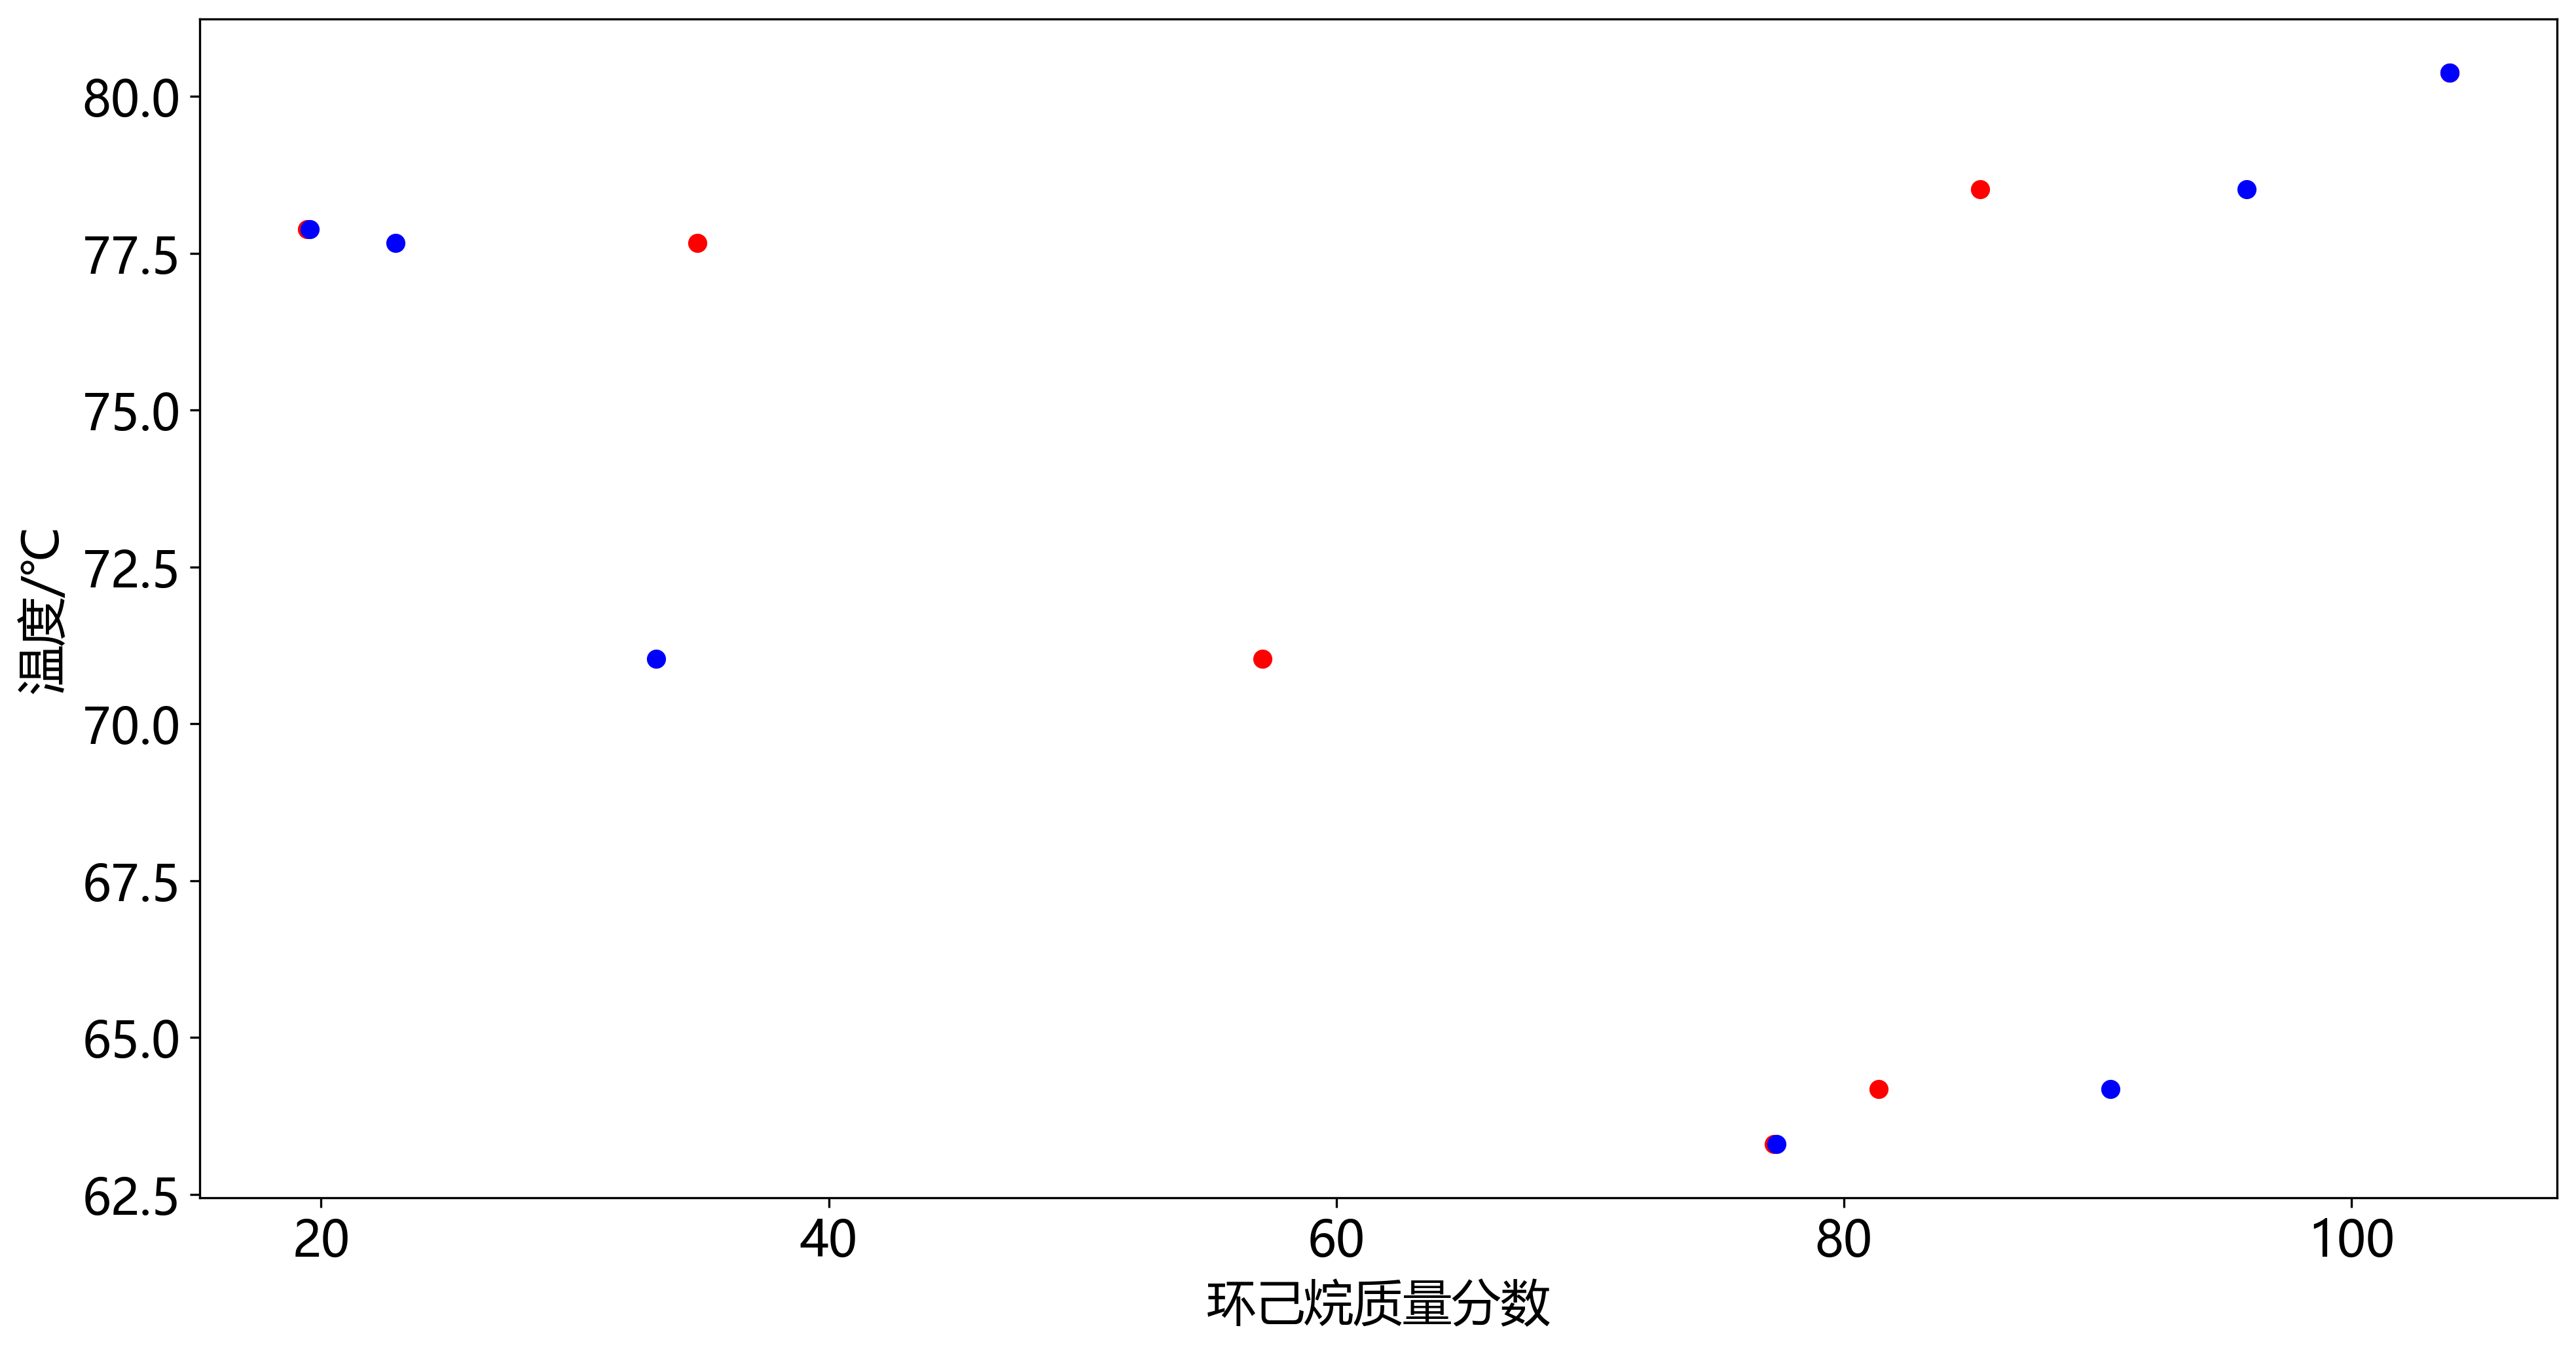

In [10]:
left, width = 0.1, 1; bottom, height = 0.1, 1; spacing = 0.1
rect = [left*0, bottom, width, height]; rect_text = [left + width*0.45, bottom+height*0.7]
fig2 = plt.figure(figsize=(12,6)); ax2 = fig2.add_axes(rect)
plt.rcParams['figure.dpi'] = 300 # 每英寸点数
plt.rcParams['font.size'] = 18
ax2.set_xlabel('环己烷质量分数'); ax2.set_ylabel('温度/℃')

ax2.scatter(gas_cs, Ts, c='r'); ax2.scatter(liquid_cs, Ts, c='b')
'''poly_regression(gas_cs[:4], Ts[:4],ax=ax2,fig=fig2,c='r'); poly_regression(gas_cs[-4:], Ts[-4:],ax=ax2,fig=fig2,c='r')
poly_regression(liquid_cs[:4], Ts[:4],ax=ax2,fig=fig2,c='b'); poly_regression(liquid_cs[-4:], Ts[-4:],ax=ax2,fig=fig2,c='b')'''

plt.savefig('Phase',bbox_inches='tight')

In [11]:
gas_cs

array([103.87855663,  85.36417791,  81.36106899,  77.23286292,
        57.0922212 ,  34.82492787,  19.43797798])

In [12]:
liquid_cs

array([103.87855663,  95.8723388 ,  90.4931612 ,  77.35796008,
        33.19866487,  22.94069828,  19.56307513])

In [13]:
Ts

[80.38, 78.52, 64.18, 63.3, 71.04, 77.67, 77.89]